<a href="https://colab.research.google.com/github/Shahbaz894/meachine-learning-/blob/main/Task_of_knn_solve_by_shahbaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('/content/glass.csv')
df.head(100
        )

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
95,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00,2
96,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15,2
97,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.00,0.24,2
98,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.00,0.00,2


In [9]:
 X=df.drop(df.columns[-1], axis=1)
 X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [10]:
y = df[df.columns[-1]]

In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.7209302325581395

In [16]:
scores=[]
for i in range (1,16):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))

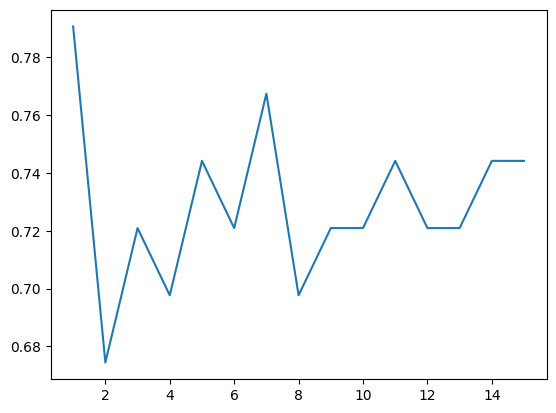

In [17]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)

In [19]:


import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Load the dataset
data = pd.read_csv('/content/glass.csv')
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [21]:
# Separate the features and target variable
X = data.drop('Type', axis=1)
y = data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [28]:
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.5813953488372093

In [23]:
# Creating a model function

def knn_func(train_x, train_label, test_x, k):
    """
    train_x - train features
    train_label - train targets
    test_x - validation data(features)
    k - nearest neighbours <int>
    """
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_x, train_label)
    prediction = knn.predict(test_x)
    return prediction

In [24]:
# For best n_neighbours
import math
n = data.shape[0]
k_max = math.sqrt(n)
k_max

14.594519519326424

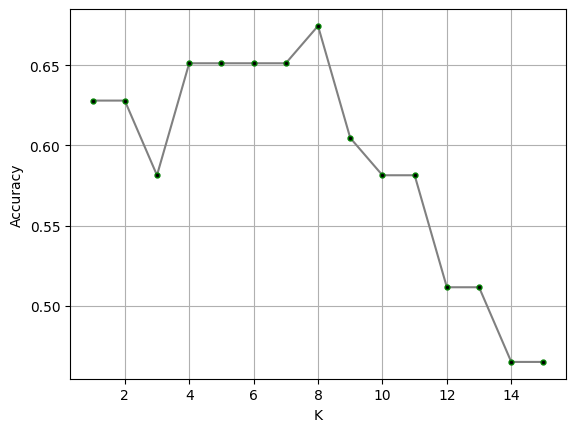

In [25]:
normal_accuracy = []
k_values = range(1,16)

for k in k_values :
    y_pred = knn_func(X_train,y_train,X_test,k)
    accur = accuracy_score(y_test,y_pred)
    normal_accuracy.append(accur)

plt.plot(k_values,normal_accuracy,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()